## 텐서 기본 개념부터 우선 잡고 갑시다  
## 이미지 다룰땐 좀 헷갈려  

텐서는 하나의 데이터를 지칭할땐 사용하지 않는다.  
복수개의 데이터를 다양한 묶음으로 설명할때 필요한 추가 차원을 고려하기 위해 만들어짐


딥러닝을 이용한 자연어처리 입문 / nlp를 위한 합성곱 신경망  
https://wikidocs.net/64066  
  
컨볼루션 신경망 레이어 이야기  
https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/  

In [1]:
import numpy as np

# 스칼라(0d텐서)
x = np.array(12)
print(x)
print(x.ndim) # 몇 차원 텐서인가

# 벡터(1d텐서)
a = np.array([1,2,3,4]) # 4차원 벡터
print(a)
print(a.ndim) # 1차원 텐서

# 행렬(2d텐서)
b = np.array([[1,2,3,4],
              [2,3,4,5],
              [3,4,5,6],
              [4,5,6,7],
              [5,6,7,8]])
print(b)
print(b.ndim)

# 3d텐서와 그 이상
c = np.array([[[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]]]) 
print(c.ndim) # = 연속 대괄호의 개수

12
0
[1 2 3 4]
1
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
2
3


In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.ndim)
print(train_images.shape)

3
(60000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

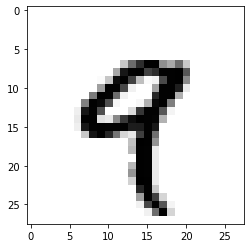

In [4]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

## channel-last/channel-first

이미지 텐서의 크기를 지정하는 방식은 두 가지입니다. (텐서플로에서 사용하는) 채널 마지막channel-last 방식과 (씨아노에서 사용하는) 채널 우선channel-first 방식입니다. 구글의 텐서플로 머신 러닝 프레임워크는 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에 놓습니다. 반면에 씨아노는 (samples, color_depth, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓습니다. 씨아노 방식을 사용하면 앞선 예는 (128, 1, 256, 256)과 (128, 3, 256, 256)이 됩니다. 케라스 프레임워크는 두 형식을 모두 지원합니다.  

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/2-2-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%91%9C%ED%98%84/

In [5]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [6]:
# 픽셀 값 0~1 정규화
train_images, test_images = train_images/255.0, test_images/255.0

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


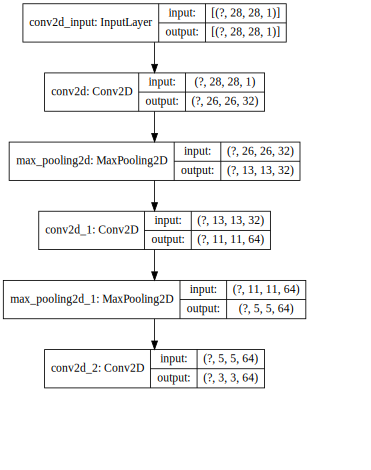

In [11]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=60).create(prog='dot', format='svg'))

In [12]:
# 마지막에 dense 넣어야하는데 dense는 input을 1d만 받음 > flatten해줘야함
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# loss : crossEntropy / adaboost / bert
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 721us/sample - loss: 0.1503 - accuracy: 0.9531
Epoch 2/5
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0480 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 47s 784us/sample - loss: 0.0345 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 54s 905us/sample - loss: 0.0252 - accuracy: 0.9923
Epoch 5/5
60000/60000 [==============================] - 49s 822us/sample - loss: 0.0206 - accuracy: 0.9936


In [ ]:
# Model.compile(
#     optimizer="rmsprop",
#     loss=None,
#     metrics=None,
#     loss_weights=None,
#     weighted_metrics=None,
#     run_eagerly=None,
#     steps_per_execution=None,
#     **kwargs
# )